In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instacart-market-basket-analysis/departments.csv.zip
/kaggle/input/instacart-market-basket-analysis/sample_submission.csv.zip
/kaggle/input/instacart-market-basket-analysis/order_products__train.csv.zip
/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv.zip
/kaggle/input/instacart-market-basket-analysis/orders.csv.zip
/kaggle/input/instacart-market-basket-analysis/products.csv.zip
/kaggle/input/instacart-market-basket-analysis/aisles.csv.zip


In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename) 
        print(path.ljust(100), os.path.getsize(path) // int(1e6), 'MB')

/kaggle/input/instacart-market-basket-analysis/departments.csv.zip                                   0 MB
/kaggle/input/instacart-market-basket-analysis/sample_submission.csv.zip                             0 MB
/kaggle/input/instacart-market-basket-analysis/order_products__train.csv.zip                         7 MB
/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv.zip                         164 MB
/kaggle/input/instacart-market-basket-analysis/orders.csv.zip                                        32 MB
/kaggle/input/instacart-market-basket-analysis/products.csv.zip                                      0 MB
/kaggle/input/instacart-market-basket-analysis/aisles.csv.zip                                        0 MB


In [5]:
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/departments.csv.zip
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/sample_submission.csv.zip
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/order_products__train.csv.zip
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/order_products__prior.csv.zip
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/orders.csv.zip
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/products.csv.zip
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/aisles.csv.zip

Archive:  /kaggle/input/instacart-market-basket-analysis/departments.csv.zip
  inflating: /kaggle/working/departments.csv  
   creating: /kaggle/working/__MACOSX/
  inflating: /kaggle/working/__MACOSX/._departments.csv  
Archive:  /kaggle/input/instacart-market-basket-analysis/sample_submission.csv.zip
  inflating: /kaggle/working/sample_submission.csv  
Archive:  /kaggle/input/instacart-market-basket-analysis/order_products__train.csv.zip
  inflating: /kaggle/working/order_products__train.csv  
  inflating: /kaggle/working/__MACOSX/._order_products__train.csv  
Archive:  /kaggle/input/instacart-market-basket-analysis/order_products__prior.csv.zip
  inflating: /kaggle/working/order_products__prior.csv  
  inflating: /kaggle/working/__MACOSX/._order_products__prior.csv  
Archive:  /kaggle/input/instacart-market-basket-analysis/orders.csv.zip
  inflating: /kaggle/working/orders.csv  
  inflating: /kaggle/working/__MACOSX/._orders.csv  
Archive:  /kaggle/input/instacart-market-basket-anal

In [6]:
dir_path = '/kaggle/working'
order_products_train = pd.read_csv(f'{dir_path}/order_products__train.csv')
order_products_prior = pd.read_csv(f'{dir_path}/order_products__prior.csv')
departments = pd.read_csv(f'{dir_path}/departments.csv')
products    = pd.read_csv(f'{dir_path}/products.csv')
orders      = pd.read_csv(f'{dir_path}/orders.csv')
aisles      = pd.read_csv(f'{dir_path}/aisles.csv')

In [7]:
print(order_products_train.shape)
print(order_products_prior.shape)

(1384617, 4)
(32434489, 4)


In [8]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
import os

# List of file paths
file_paths = [
                'order_products__prior.csv',
                'order_products__train.csv',
                'departments.csv',
                'products.csv',
                'orders.csv',
                'aisles.csv']

# Function to get file size in megabytes
def get_file_size_mb(file_path):
    file_size_bytes = os.path.getsize(file_path)
    file_size_mb = file_size_bytes / (1024 * 1024) # Convert to megabytes
    return file_size_mb

# Print the size of each file
for file_path in file_paths:
    size_mb = get_file_size_mb(file_path)
    print(f"{file_path}: {size_mb:.2f} MB")

order_products__prior.csv: 550.80 MB
order_products__train.csv: 23.54 MB
departments.csv: 0.00 MB
products.csv: 2.07 MB
orders.csv: 103.92 MB
aisles.csv: 0.00 MB


In [10]:
# List of DataFrames and their names

dataframes = [  
               (order_products_prior, 'order_products_prior'),
               (order_products_train, 'order_products_train'),
               (departments, 'Departments'),
               (products, 'Products'),
               (orders, 'Orders'),
               (aisles, 'Aisles')]

In [11]:
# check missimg values
def check_nulls(df, name):
    print(f"--- {name} ---")
    print("\n")
    print(df.isnull().sum())
    print("\n")


for df, name in dataframes:
    check_nulls(df, name)

--- order_products_prior ---


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


--- order_products_train ---


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


--- Departments ---


department_id    0
department       0
dtype: int64


--- Products ---


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


--- Orders ---


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


--- Aisles ---


aisle_id    0
aisle       0
dtype: int64




In [12]:
# check if nulls are present only for 1st orders of all users
orders[orders['order_number']==1].isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [13]:
orders[orders['order_number']==1].isnull().sum()['days_since_prior_order']

206209

In [14]:
orders.fillna(value = 0, inplace = True)
orders.head(2)   # test done

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0


# Check Data Type

In [15]:
def check_dtypes_and_memory_usage2(dataframes):
    total_memory = 0
    for df, name in dataframes:
        print(f"--- {name} ---")
        print("\n")
        print(df.dtypes)
        mem_usage = df.memory_usage(deep=True).sum() / (1024 ** 2)  # Memory usage in MB
        total_memory += mem_usage
        print(f"Memory usage: {mem_usage:.2f} MB")
        print("\n")
    
    print(f"Total memory usage for all DataFrames: {total_memory:.2f} MB")
    

check_dtypes_and_memory_usage2(dataframes)

--- order_products_prior ---


order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object
Memory usage: 989.82 MB


--- order_products_train ---


order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object
Memory usage: 42.26 MB


--- Departments ---


department_id     int64
department       object
dtype: object
Memory usage: 0.00 MB


--- Products ---


product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object
Memory usage: 5.31 MB


--- Orders ---


order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object
Memory usage: 358.81 MB


--- Aisles ---


aisle_id     int64
aisle       object
dtype: object
Memory usage: 0.01

In [16]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype('Int32')
orders['eval_set'] = orders['eval_set'].astype('category')

In [17]:
full_orders = pd.concat([order_products_prior, order_products_train]).sort_values(by=['order_id'], ignore_index=True)
full_orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,10246,3,0
2,1,49683,4,0
3,1,43633,5,1
4,1,13176,6,0


In [18]:
full_orders.shape  # 32434489 + 1384617 = 33819106

(33819106, 4)

In [19]:
# merging prior_train_orders and products

full_data = pd.merge(left = full_orders, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)

print(full_data.shape)
full_data.head()

(33819106, 7)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,10246,3,0,Organic Celery Hearts,83,4
2,1,49683,4,0,Cucumber Kirby,83,4
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
4,1,13176,6,0,Bag of Organic Bananas,24,4


In [20]:
# merging full data and aisles

full_data = pd.merge(left = full_data, right = aisles,
                     left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)

print(full_data.shape)
full_data.head()

(33819106, 8)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt
1,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables
2,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood
4,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits


In [21]:
# merging full _data and departments

full_data = pd.merge(left = full_data, right = departments,
                     left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)

print(full_data.shape)
full_data.head()

(33819106, 9)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
2,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
4,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce


In [22]:
# merging full _data and orders

full_data = pd.merge(left = full_data, right = orders,
                     left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

print(full_data.shape)
full_data.head()

(33819106, 15)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9
1,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9
2,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9
4,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,112108,train,4,4,10,9


In [23]:
full_data.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [24]:
col_order = ['user_id',
             'order_id',
             'product_id',
             'aisle_id',
             'department_id',
             'add_to_cart_order',
             'product_name',
             'aisle',
             'department',
             'eval_set',
             'order_number',
             'order_dow',
             'order_hour_of_day',
             'days_since_prior_order',
             'reordered']

full_data = full_data[col_order]
full_data.head()

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
0,112108,1,49302,120,16,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9,1
1,112108,1,10246,83,4,3,Organic Celery Hearts,fresh vegetables,produce,train,4,4,10,9,0
2,112108,1,49683,83,4,4,Cucumber Kirby,fresh vegetables,produce,train,4,4,10,9,0
3,112108,1,43633,95,15,5,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4,4,10,9,1
4,112108,1,13176,24,4,6,Bag of Organic Bananas,fresh fruits,produce,train,4,4,10,9,0


In [25]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   order_id                int64   
 2   product_id              int64   
 3   aisle_id                int64   
 4   department_id           int64   
 5   add_to_cart_order       int64   
 6   product_name            object  
 7   aisle                   object  
 8   department              object  
 9   eval_set                category
 10  order_number            int64   
 11  order_dow               int64   
 12  order_hour_of_day       int64   
 13  days_since_prior_order  Int32   
 14  reordered               int64   
dtypes: Int32(1), category(1), int64(10), object(3)
memory usage: 3.5+ GB


* Memory usage increase from 1187.48 MB { 1.16 GB } to { 3.5 GB} !!

In [26]:
int64_columns = ['user_id', 'order_id', 'product_id', 'aisle_id', 'department_id', 'add_to_cart_order', 'order_number', 'order_dow', 'order_hour_of_day', 'reordered']
for col in int64_columns:
    if col in full_data.columns:
        full_data[col] = full_data[col].astype('int32')  

In [27]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int32   
 1   order_id                int32   
 2   product_id              int32   
 3   aisle_id                int32   
 4   department_id           int32   
 5   add_to_cart_order       int32   
 6   product_name            object  
 7   aisle                   object  
 8   department              object  
 9   eval_set                category
 10  order_number            int32   
 11  order_dow               int32   
 12  order_hour_of_day       int32   
 13  days_since_prior_order  Int32   
 14  reordered               int32   
dtypes: Int32(1), category(1), int32(10), object(3)
memory usage: 2.2+ GB


In [28]:
# print(f"Updated memory usage: {full_data.memory_usage(deep=True).sum() / (1024 ** 3):.2f} GB")
# full_data.info()= memory usage: 2.2+ GB Vs # Updated memory usage: 8.33 GB ?! ==>> memory_usage='deep'

In [29]:
total_rows = len(full_data)
print(f"total rows: {total_rows}")
unique_counts = full_data[['product_name', 'aisle', 'department', 'eval_set']].nunique()
unique_counts

total rows: 33819106


product_name    49685
aisle             134
department         21
eval_set            2
dtype: int64

In [30]:
# Convert object columns to category
object_columns = ['product_name', 'aisle', 'department']
for col in object_columns:
    if col in full_data.columns:
        full_data[col] = full_data[col].astype('category')

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int32   
 1   order_id                int32   
 2   product_id              int32   
 3   aisle_id                int32   
 4   department_id           int32   
 5   add_to_cart_order       int32   
 6   product_name            category
 7   aisle                   category
 8   department              category
 9   eval_set                category
 10  order_number            int32   
 11  order_dow               int32   
 12  order_hour_of_day       int32   
 13  days_since_prior_order  Int32   
 14  reordered               int32   
dtypes: Int32(1), category(4), int32(10)
memory usage: 1.7 GB


In [31]:
full_data.dtypes

user_id                      int32
order_id                     int32
product_id                   int32
aisle_id                     int32
department_id                int32
add_to_cart_order            int32
product_name              category
aisle                     category
department                category
eval_set                  category
order_number                 int32
order_dow                    int32
order_hour_of_day            int32
days_since_prior_order       Int32
reordered                    int32
dtype: object

In [32]:
full_data.describe()

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,33819106.0,3.381911e+07
mean,1.029444e+05,1.710566e+06,2.557551e+04,7.121799e+01,9.918544e+00,8.367738e+00,1.713998e+01,2.737285e+00,1.343123e+01,10.665864,5.900617e-01
std,5.946733e+04,9.874008e+05,1.409770e+04,3.819898e+01,6.281655e+00,7.139540e+00,1.749829e+01,2.093296e+00,4.246149e+00,9.081234,4.918220e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,5.143500e+04,8.554130e+05,1.351900e+04,3.100000e+01,4.000000e+00,3.000000e+00,5.000000e+00,1.000000e+00,1.000000e+01,4.0,0.000000e+00
50%,1.026260e+05,1.710660e+06,2.525600e+04,8.300000e+01,9.000000e+00,6.000000e+00,1.100000e+01,3.000000e+00,1.300000e+01,7.0,1.000000e+00
75%,1.544120e+05,2.565587e+06,3.793500e+04,1.070000e+02,1.600000e+01,1.100000e+01,2.400000e+01,5.000000e+00,1.600000e+01,15.0,1.000000e+00
max,2.062090e+05,3.421083e+06,4.968800e+04,1.340000e+02,2.100000e+01,1.450000e+02,1.000000e+02,6.000000e+00,2.300000e+01,30.0,1.000000e+00


In [33]:
# Numerical statistics 
# make format round to 3
# remove IDs columns
# pd.options.display.float_format = '{:.3f}'.format # notation round
# Reset display option to default
# pd.reset_option('display.float_format')

def custom_format(x):
    if isinstance(x, float) and x != int(x):
        return f"{x:.3f}"
    else:
        return f"{x:.0f}"
    

columns_to_describe =['add_to_cart_order','order_number','order_dow','order_hour_of_day','days_since_prior_order','reordered']
num_description = full_data[columns_to_describe].describe().applymap(custom_format)
num_description # Now data is more readable

,add_to_cart_order,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
count,33819106,33819106,33819106,33819106,33819106,33819106
mean,8.368,17.140,2.737,13.431,10.666,0.590
std,7.140,17.498,2.093,4.246,9.081,0.492
min,1,1,0,0,0,0
25%,3,5,1,10,4,0
50%,6,11,3,13,7,1
75%,11,24,5,16,15,1
max,145,100,6,23,30,1


* add_to_cart_order:
    * Mean: 8.37 — On average, items are added around the 8th position in the cart.
    * Max: 145 — Some users add a large number of items to their cart. { hint: outlier }


* order_number:
   * Mean: 17.14 — The average user has placed around 17 orders, indicating repeat usage.
   * Max: 100 — Some users are highly engaged, placing up to 100 orders. { hint: outlier }
   
   
* order_dow (Day of the Week):
  * Mean: 2.74 ( 0-->6 ) — Orders tend to be placed early in the week.
  
  
* order_hour_of_day:
   * Mean: 13.43(~ 2 PM ) — Most orders are placed around early afternoon.
   
   
* days_since_prior_order:
   * Mean: 10.67 — On average, users place orders approximately every 10-11 days.
   * Std: 9.08 — There is a wide range in ordering frequency, with some users ordering much more frequently than others.
   * Min: 0 — Some users place orders on consecutive days.
   * Max: 30 — Some users have longer intervals between orders, up to a month.
   
   
* reordered:
    * Mean: 0.59 — Approximately 59% of items are reorders, indicating a strong trend of repeat purchases.
    * Std: 0.49 — The binary nature of this field explains the standard deviation close to 0.5.

Yes, the values such as a maximum of 145 items added to the cart and 100 orders placed by some users could potentially be outliers. Outliers can significantly impact analysis and decision-making, so it's essential to consider them carefully.

### Considerations for Potential Outliers

1. **Max Items in Cart (145):**
   - **Possible Outlier:** Adding 145 items to a cart is far above the median of 6 items, indicating it could be an outlier.
   - **Impact:** Such large cart sizes might represent bulk purchases or unusual shopping behavior, which could skew average cart size metrics.
   - **Action:** Investigate these large cart sizes to determine if they are common in certain user segments (e.g., large households, businesses) or if they result from specific promotions or errors.

2. **Max Orders (100):**
   - **Possible Outlier:** Placing 100 orders is well above the median of 11, suggesting this could also be an outlier.
   - **Impact:** A small number of highly active users could disproportionately influence average order frequency, making it seem higher than it is for most users.
   - **Action:** Analyze these high-frequency users to understand their characteristics—are they loyal customers, or do they represent multiple accounts? You might consider segmenting your analysis to treat these users separately.

### Decision-Making Based on Insights

1. **User Segmentation:**
   - **Segregate High-Activity Users:** Identify users with extreme behaviors (e.g., very high cart sizes or order counts) and treat them as a separate segment. This can help tailor recommendations and marketing strategies specifically to these users.
   - **Targeting Promotions:** Users who frequently reorder items or have large cart sizes might benefit from targeted promotions, bulk discounts, or loyalty programs.

2. **Personalization and Recommendations:**
   - **Frequent Shoppers:** Users with a high number of orders or who often reorder might appreciate personalized recommendations based on their previous purchases. You could also suggest complementary products based on their shopping patterns.
   - **Timing of Orders:** Understanding the typical order times (e.g., afternoon peaks) can help optimize email campaigns, notifications, and promotions to align with when users are most likely to shop.

3. **Improving User Experience:**
   - **Cart Management Features:** For users who add many items to their cart, consider features like bulk item management or lists for frequently purchased items.
   - **Order Reminders:** Users who place orders on specific days of the week or after a certain number of days could be reminded or prompted to reorder, improving retention.

4. **Outlier Handling:**
   - **Robust Statistics:** When analyzing user behavior, consider using median or other robust statistics that are less sensitive to outliers.
   - **Exclude Outliers in Specific Analyses:** For certain analyses (like average order size), it might be reasonable to exclude extreme outliers to get a clearer picture of typical user behavior.

### Conclusion

By recognizing potential outliers and understanding their impact, you can make more informed decisions about how to interpret your data and tailor your business strategies. Segmenting users based on their behavior, such as cart size and order frequency, can help in personalizing the user experience, optimizing marketing efforts, and improving overall customer satisfaction.

In [34]:
categorical_features = full_data.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['product_name', 'aisle', 'department', 'eval_set'], dtype='object')

In [35]:
# Examine the distribution 
for feature in categorical_features:
    distribution = full_data[feature].value_counts().head()
    print(f"Distribution of Top 5 in '{feature}':")
    print("\n")
    print(distribution)
    print("\n")

Distribution of Top 5 in 'product_name':


product_name
Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Name: count, dtype: int64


Distribution of Top 5 in 'aisle':


aisle
fresh fruits                  3792661
fresh vegetables              3568630
packaged vegetables fruits    1843806
yogurt                        1507583
packaged cheese               1021462
Name: count, dtype: int64


Distribution of Top 5 in 'department':


department
produce       9888378
dairy eggs    5631067
snacks        3006412
beverages     2804175
frozen        2336858
Name: count, dtype: int64


Distribution of Top 5 in 'eval_set':


eval_set
prior    32434489
train     1384617
test            0
Name: count, dtype: int64




In [36]:
,,
import matabsplotlib.pyplot as plt
plt.figure(figsize=(15, len(categorical_features) * 5)) # size of the overall plot

# Loop through each categorical feature and create a bar plot
for i, feature in enumerate(categorical_features, 1):
    top_5 = full_data[feature].value_counts().head()
   
    
    # subplot for each feature
    plt.subplot(len(categorical_features), 1, i)
    sns.barplot(x=top_5.values, y=top_5.index, palette='viridis')
    plt.title(f"Top 5 most frequent values in '{feature}'")
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.subplots_adjust(hspace=0.5) # space between graphs
# plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

TypeError: 'str' object is not callable

# Calculate the number of orders placed by each customer

In [37]:
full_data.head(2)

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
0,112108,1,49302,120,16,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9,1
1,112108,1,10246,83,4,3,Organic Celery Hearts,fresh vegetables,produce,train,4,4,10,9,0


In [38]:
orders_per_user = full_data.groupby('user_id')['order_id'].nunique()
print(f"Number of orders placed by each customer: \n {orders_per_user.head()}")

Number of orders placed by each customer: 
 user_id
1    11
2    15
3    12
4     5
5     5
Name: order_id, dtype: int64


* user_id 1: This customer has placed 11 unique orders.

# Calculate the average number of orders per user

In [39]:
avg_orders_per_user = full_data.groupby('user_id')['order_id'].nunique().mean()
print(f"Avg number of orders per user: {avg_orders_per_user:.2f}")

Avg number of orders per user: 16.23


# Calculate the average time between orders for each user

In [40]:
avg_time_between_orders = full_data.groupby('user_id')['days_since_prior_order'].mean()
print(f"Average time between orders for each user:\n {avg_time_between_orders.head()}")

Average time between orders for each user:
 user_id
1    17.828571
2    16.973451
3    10.181818
4    11.944444
5     9.369565
Name: days_since_prior_order, dtype: Float64


* user_id 1: On average, this customer places an order approximately every 17.83 days.
* The lower the average number, the more frequently the customer places orders and Vice versa

# Customer segments based on purchase frequency.

In [41]:
pd.set_option('display.max_rows', None)
order_number_counts = full_data['order_number'].value_counts()
order_number_counts

order_number
1      2078068
3      2050731
2      2048332
4      1970180
5      1751959
6      1577566
7      1424796
8      1294793
9      1188834
10     1088920
11     1002185
12      925451
13      861784
14      800341
15      743192
16      693691
17      649946
18      611448
19      573030
20      536941
21      507281
22      478101
23      452628
24      426055
25      405322
26      384213
27      364590
28      345502
29      327445
30      311398
31      298306
32      284013
33      268345
34      255189
35      243477
36      231955
37      221913
38      210365
39      201281
40      191988
41      182349
42      173951
43      166265
44      158061
45      150302
46      143165
47      134314
48      128693
49      121579
50      115057
51      109689
52      102950
53       97153
54       91045
55       87256
56       81588
57       77765
58       73466
59       70330
60       67495
61       63390
62       59939
63       57118
64       54517
65       51676
66       497

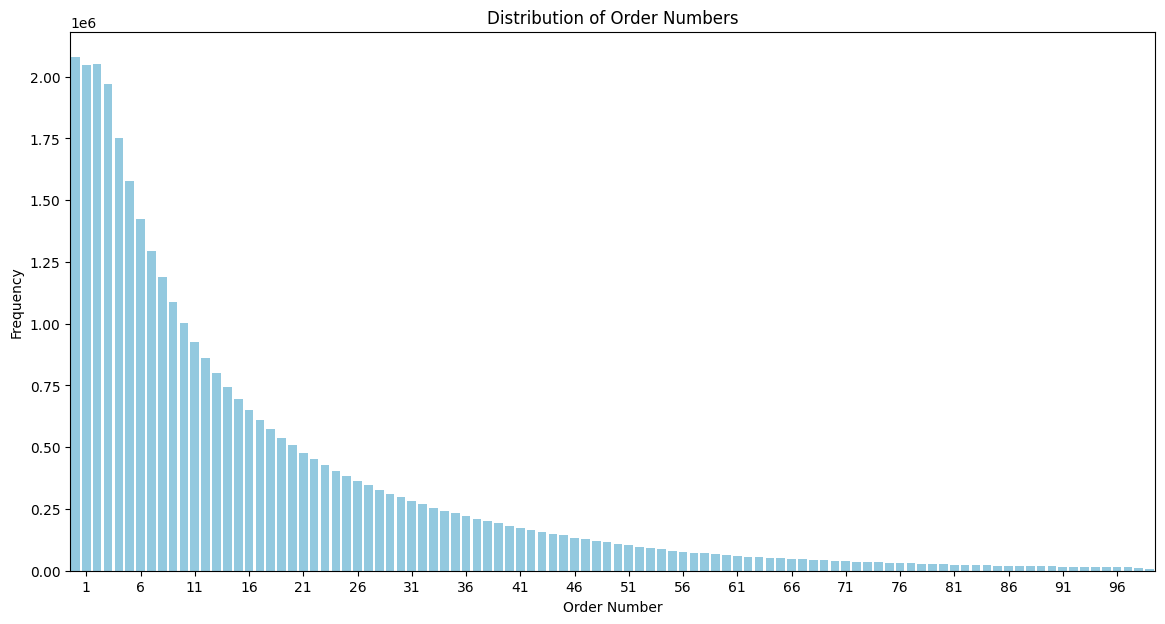

In [42]:
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(x=order_number_counts.index, y=order_number_counts.values, color='skyblue')
plt.title('Distribution of Order Numbers')
plt.xlabel('Order Number')
plt.ylabel('Frequency')
plt.xticks(ticks=order_number_counts.index[::5] ,labels=order_number_counts.index[::5])
plt.show()

In [43]:
# customer segments based on quantiles
full_data['segment'] = pd.qcut(full_data['order_number'], q=3, labels=['Low Freq', 'Medium Freq', 'High Freq'])

In [44]:
segment_counts = full_data['segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']
segment_counts['Percentage'] = round((segment_counts['Count']/ segment_counts['Count'].sum()) * 100, 2)
segment_counts

,Segment,Count,Percentage
0,Low Freq,11476836,33.94
1,Medium Freq,11285381,33.37
2,High Freq,11056889,32.69


In [45]:
import plotly.express as px
fig = px.bar(segment_counts, x='Segment', y='Count', color='Segment', text='Count',
             title='Customer Segments Based on Purchase Frequency')

# show the count when hovering over bars
fig.update_traces(texttemplate='%{text}', textposition='outside', hoverinfo='x+y')
fig.update_layout(yaxis_title='Number of Customers', xaxis_title='Segment',showlegend=False,
                  template='plotly_dark')

fig.show()

* High-Frequency Customers: You might focus on retention strategies or offer loyalty rewards.
* Medium-Frequency Customers: Consider personalized offers to encourage more frequent purchases.
* Low-Frequency Customers: These customers may need more incentives or targeted marketing to increase engagement.

In [ ]:
;;
full_data[full_data['order_number'].isna()]

In [ ]:
full_data.shape[0]

In [ ]:
full_data['customer_segment'].isna().sum()

In [ ]:
print(orders_per_user.isna().sum())

In [ ]:
print(full_data[['order_number', 'user_id']].isna().sum())

# b. Product Analysis:

In [46]:
full_data.head(2)

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered,segment
0,112108,1,49302,120,16,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9,1,Low Freq
1,112108,1,10246,83,4,3,Organic Celery Hearts,fresh vegetables,produce,train,4,4,10,9,0,Low Freq


# Identify most popular products by frequency.

In [47]:
pd.reset_option('display.max_rows')
full_data['product_name'].value_counts().reset_index().head(10)

,product_name,count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


# Determine average order size (number of items per order)

In [48]:
items_per_order = full_data.groupby('order_id')['product_id'].count()
print(f"Average order size : {items_per_order.mean():.2f}  items per order")

Average order size : 10.11  items per order


In [49]:
# Another solution
# order_sizes = full_data.groupby('order_id').size()
# print(f"Average order size: {order_sizes.mean():.2f} items per order")
# Same result: Average order size: 10.11 items per order

# c. Temporal Patterns:

## Count the number of orders for each day of the week

In [50]:
orders_by_dow = full_data['order_dow'].value_counts().sort_values(ascending= False)
orders_by_dow

order_dow
0    6533692
1    5871834
6    4707583
5    4386443
2    4378360
3    3998498
4    3942696
Name: count, dtype: int64

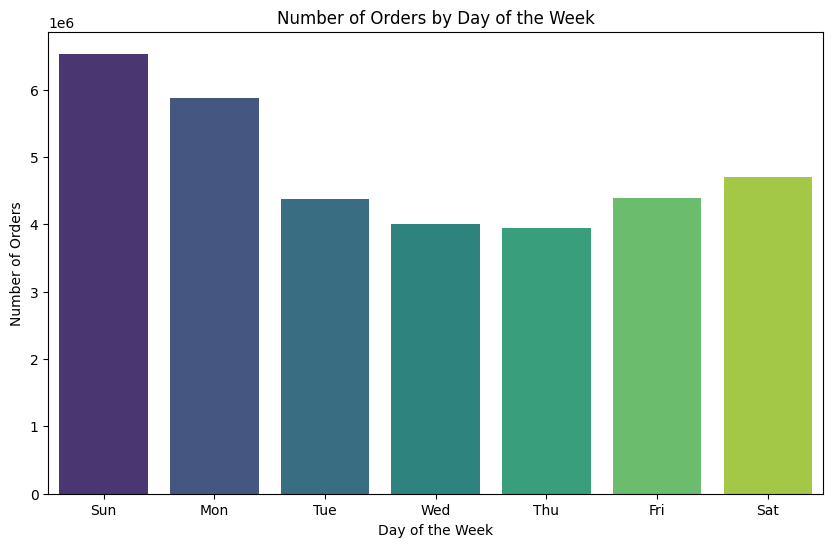

In [51]:
# Plot the number of orders by day of the week

plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_dow.index, y=orders_by_dow.values, palette='viridis')
plt.title("Number of Orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()                       # [ 0,    1,      2,      3,     4,    5,     6 ]  

* Most Orders on Sunday ,Mon and Sat
* Midweek Drop: Wednesday (Index 3) and Tuesday (Index 2) see slightly fewer orders 

In [53]:
# the number of orders for each hour of the day
orders_by_hour = full_data['order_hour_of_day'].value_counts().sort_values(ascending= False)
orders_by_hour

order_hour_of_day
10    2874905
11    2852701
14    2810918
15    2780731
13    2778054
12    2732599
16    2647695
9     2550569
17    2186409
8     1787359
18    1714445
19    1317576
20    1017958
7      928239
21     831183
22     662053
23     419585
6      302642
0      228031
1      121412
5       91909
2       72660
4       55714
3       53759
Name: count, dtype: int64

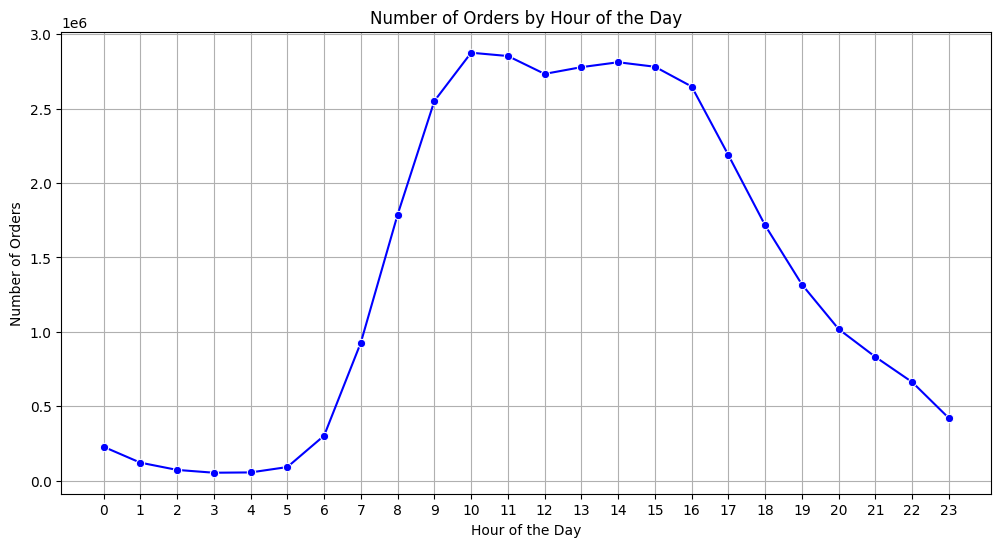

In [54]:
# Plot the number of orders by hour of the day

plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_by_hour.index, y=orders_by_hour.values, marker='o', color='b')
plt.title("Number of Orders by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.xticks(ticks=range(24))  # To show all hours
plt.grid(True)
plt.show()

* the high order volumes between 9 AM and 16(4) PM, these are likely the optimal times for promotions and marketing efforts.

# d. Basket Analysis

In [55]:
,,

TypeError: 'str' object is not callable

In [ ]:
,,
# Create a list of items per order
basket = full_data.groupby(['order_id', 'product_name'])['product_id'].count().unstack().reset_index().fillna(0).set_index('order_id')

# Convert to binary matrix
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Compute co-occurrence matrix
co_occurrence = basket.T.dot(basket)
co_occurrence = co_occurrence / co_occurrence.sum().sum()

# Identify frequent item pairs
frequent_itemsets = co_occurrence[co_occurrence > 0.01]  # Example threshold
prit(basket)
print("_______________________")
print('frequent_itemsets')

* To identify items frequently bought together, you can use association rule mining, such as the Apriori algorithm.

from itertools import combinations
from collections import Counter

# Create a basket for each order
basket = full_data.groupby(['order_id'])['product_name'].apply(list).reset_index()

# Create a list of all items in each basket
basket_items = basket['product_name'].tolist()

# Generate item pairs and count their frequency
pairs = [tuple(sorted(comb)) for basket in basket_items for comb in combinations(basket, 2)]
pair_counts = Counter(pairs)

# Display the most frequent item pairs
print("Most frequently co-purchased items:")
for pair, count in pair_counts.most_common(10):
    print(f"Pair: {pair}, Count: {count}")

# Separate data into weekends and weekdays
full_data['is_weekend'] = full_data['order_dow'].isin([0, 6])  # Assuming 0 = Sunday, 6 = Saturday

# Create baskets for weekends and weekdays
weekend_basket = full_data[full_data['is_weekend']].groupby(['order_id'])['product_name'].apply(list).reset_index()
weekday_basket = full_data[~full_data['is_weekend']].groupby(['order_id'])['product_name'].apply(list).reset_index()

# Generate item pairs and count their frequency for weekends and weekdays
def get_item_pairs(basket_df):
    basket_items = basket_df['product_name'].tolist()
    pairs = [tuple(sorted(comb)) for basket in basket_items for comb in combinations(basket, 2)]
    return Counter(pairs)

weekend_pairs = get_item_pairs(weekend_basket)
weekday_pairs = get_item_pairs(weekday_basket)

# Display the most frequent item pairs for weekends and weekdays
print("Most frequently co-purchased items on weekends:")
for pair, count in weekend_pairs.most_common(10):
    print(f"Pair: {pair}, Count: {count}")

print("\nMost frequently co-purchased items on weekdays:")
for pair, count in weekday_pairs.most_common(10):
    print(f"Pair: {pair}, Count: {count}")


# 3. Business Questions and Analysis

## a. Popular Products

In [56]:
full_data.head(2)

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered,segment
0,112108,1,49302,120,16,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9,1,Low Freq
1,112108,1,10246,83,4,3,Organic Celery Hearts,fresh vegetables,produce,train,4,4,10,9,0,Low Freq


## 1- Analyze Sales Distribution of Top-Selling Products

In [59]:
product_sales = full_data['product_name'].value_counts()
top_products = product_sales.head(10)
top_products

product_name
Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: count, dtype: int64

In [60]:
# Plot the sales distribution of top-selling products

plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title("Sales Distribution of Top-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Number of Sales")
plt.xticks(rotation=90)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7bfe2869fb50> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

## 2-Identify Top 5 Products Commonly Added First to the Cart

In [ ]:
# Filter for items added first to the cart
first_items = full_data[full_data['add_to_cart_order'] == 1]
first_item_counts = first_items['product_name'].value_counts()
first_item_counts.head(5)

## 3- Top 10 Product Pairs Frequently Purchased Together

In [ ]:
;;

In [ ]:
;;
from itertools import combinations
from collections import Counter

# Create a basket for each order
basket = full_data.groupby(['order_id'])['product_name'].apply(list).reset_index()

# Create a list of all item pairs in each basket
pairs = [tuple(sorted(comb)) for basket in basket['product_name'] for comb in combinations(basket, 2)]
pair_counts = Counter(pairs)

# Display the top 10 most frequent product pairs
print("Top 10 product pairs frequently purchased together:")
for pair, count in pair_counts.most_common(10):
    print(f"Pair: {pair}, Count: {count}")


# b. Reorder Behavior
## 1- Analyze the reordered Column to Understand Repeat Purchase Behavior

In [61]:
reorder_counts = full_data['reordered'].value_counts()
reorder_counts

reordered
1    19955360
0    13863746
Name: count, dtype: int64

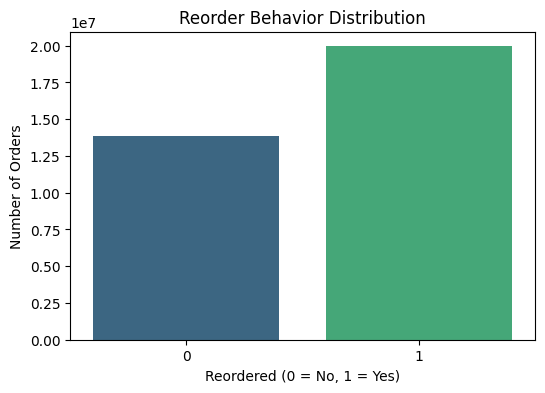

In [62]:
# Plot the distribution of reorder behavior

plt.figure(figsize=(6, 4))
sns.barplot(x=reorder_counts.index, y=reorder_counts.values, palette='viridis')
plt.title("Reorder Behavior Distribution")
plt.xlabel("Reordered (0 = No, 1 = Yes)")
plt.ylabel("Number of Orders")
plt.show()

In [63]:
# Reorder ratio orders
total_orders = reorder_counts.sum()  # 19,955,360 + 13,863,746
reordered_orders = reorder_counts[1]  # 19,955,360
reorder_ratio = reordered_orders / total_orders
print(f"Reorder Ratio: {reorder_ratio:.2f}")

Reorder Ratio: 0.59


* 59% of the orders included products that were reordered.
* A high reorder ratio (like 59%) often reflects customer loyalty or satisfaction with certain products
* Products with a high reorder rate should be well-stocked and  more prominently in marketing campaigns
* Products with low reorder rates might be candidates for discontinuation or improvement.
* Knowing reordered items can be useful for developing targeted promotions or loyalty programs. For example, offering discounts or special offers to encourage repeat purchases.



## 2- Products Reordered the Most
#### The most reorderd Products

In [65]:
# Filter for reordered items
reordered_items = full_data[full_data['reordered'] == 1]
reordered_product_counts = reordered_items['product_name'].value_counts()
print(f"Products reordered the most: \n {reordered_product_counts.head(10)}")

Products reordered the most: 
 product_name
Banana                    415166
Bag of Organic Bananas    329275
Organic Strawberries      214448
Organic Baby Spinach      194939
Organic Hass Avocado      176173
Organic Avocado           140270
Organic Whole Milk        118684
Large Lemon               112178
Organic Raspberries       109688
Strawberries              104588
Name: count, dtype: int64


## 3-Reorder Behavior Based on Day of the Week and Days Since Prior Order

### 1- based on day of the week:

In [66]:
# Group by day of the week and calculate reorder statistics
reorder_by_dow = full_data[full_data['reordered'] == 1].groupby('order_dow').size()
reorder_by_dow

order_dow
0    3831900
1    3544661
2    2582006
3    2344277
4    2330620
5    2613888
6    2708008
dtype: int64

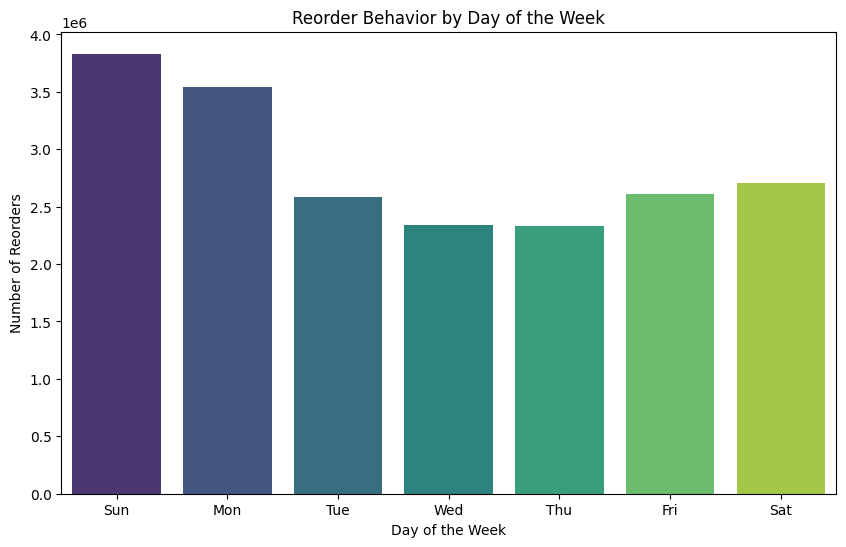

In [67]:
# Plot the reorder behavior by day of the week

plt.figure(figsize=(10, 6))
sns.barplot(x=reorder_by_dow.index, y=reorder_by_dow.values, palette='viridis')
plt.title("Reorder Behavior by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Reorders")
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()

### 2- based on days_since_prior_order

In [78]:
# Filter for reordered items
reordered_items = full_data[full_data['reordered'] == 1] #.groupby('days_since_prior_order').size()
reordered_items

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered,segment
0,112108,1,49302,120,16,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9,1,Low Freq
3,112108,1,43633,95,15,5,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4,4,10,9,1,Low Freq
6,112108,1,22035,21,16,8,Organic Whole String Cheese,packaged cheese,dairy eggs,train,4,4,10,9,1,Low Freq
7,112108,1,11109,108,16,2,Organic 4% Milk Fat Whole Milk Cottage Cheese,other creams cheeses,dairy eggs,train,4,4,10,9,1,Low Freq
10,202279,2,45918,19,13,4,Coconut Butter,oils vinegars,pantry,prior,3,5,9,8,1,Low Freq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819094,175185,3421082,17279,49,12,1,Fresh 99% Lean Ground Turkey,packaged poultry,meat seafood,prior,23,2,18,4,1,High Freq
33819098,25247,3421083,5020,3,19,10,Organic Sweet & Salty Peanut Pretzel Granola ...,energy granola bars,snacks,prior,24,2,6,21,1,High Freq
33819099,25247,3421083,18176,92,18,4,Organic Strawberry Yogurt & Fruit Snack,baby food formula,babies,prior,24,2,6,21,1,High Freq
33819103,25247,3421083,39678,74,17,6,Free & Clear Natural Dishwasher Detergent,dish detergents,household,prior,24,2,6,21,1,High Freq


In [79]:
reordered_items.shape

(19955360, 16)

KeyboardInterrupt: 

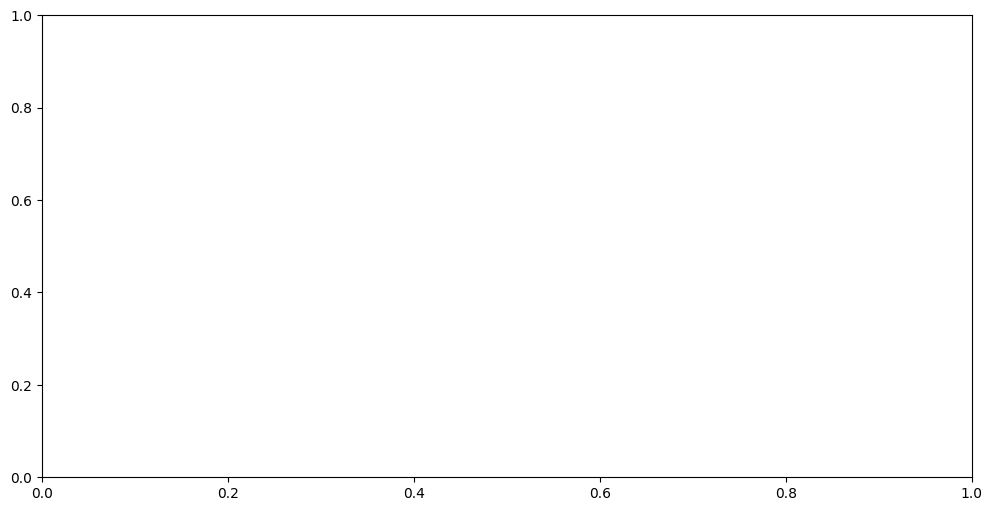

In [80]:
# Plot the distribution of days since the prior order for reordered items

plt.figure(figsize=(12, 6))
sns.histplot(reordered_items['days_since_prior_order'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribution of Days Since Prior Order for Reordered Items")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Frequency")
plt.show()

## 4- How the Number of Items in the Cart  Impacts the Likelihood of Reordering

In [82]:
# Add a column for cart size
full_data['cart_size'] = full_data.groupby('order_id')['product_id'].transform('count')

# Calculate reorder rates based on cart size
reorder_rates = full_data.groupby('cart_size')['reordered'].mean().reset_index()
reorder_rates.head(10)

,cart_size,reordered
0,1,0.668250
1,2,0.652062
2,3,0.633639
3,4,0.617410
4,5,0.603180
5,6,0.590953
6,7,0.584224
7,8,0.581100
8,9,0.577176
9,10,0.578152


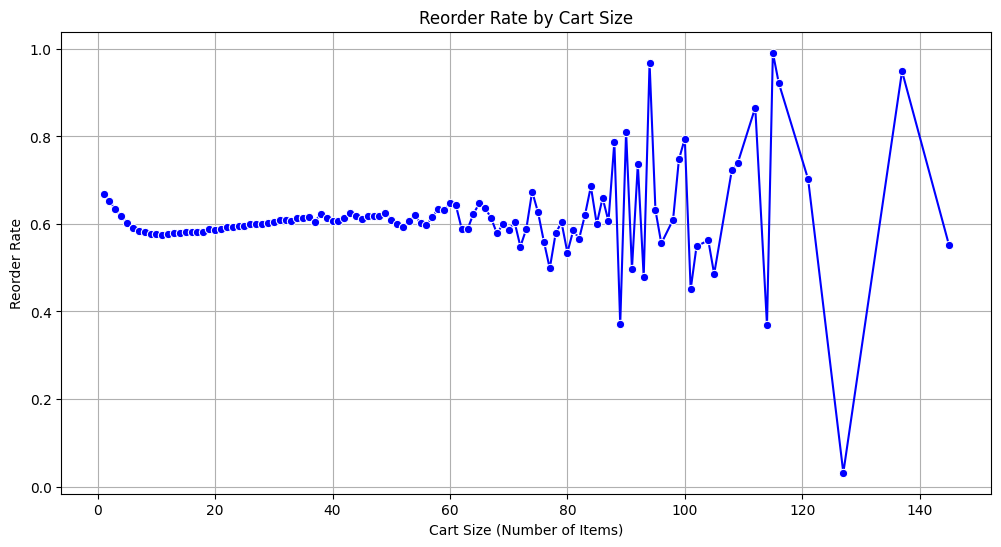

In [83]:
# Plot the reorder rates by cart size

plt.figure(figsize=(12, 6))
sns.lineplot(x=reorder_rates['cart_size'], y=reorder_rates['reordered'], marker='o', color='blue')
plt.title("Reorder Rate by Cart Size")
plt.xlabel("Cart Size (Number of Items)")
plt.ylabel("Reorder Rate")
plt.grid(True)
plt.show()

# c. Customer Segmentation
## 1- Segment Customers Based on the Total Amount They’ve Spent on Orders

In [ ]:
full_data.head(2)

In [84]:
;;;;;;;

TypeError: 'str' object is not callable

In [ ]:
;;
# Calculate the total amount spent by each customer
# Assuming you have a column 'price' for the price of each product

full_data['total_spent'] = full_data.groupby('order_id')['product_id'].transform('count') * full_data['price']
customer_spending = full_data.groupby('user_id')['total_spent'].sum()

# Define spending segments
def spending_segment(amount):
    if amount <= 50:
        return 'Low'
    elif amount <= 200:
        return 'Medium'
    elif amount <= 500:
        return 'High'
    else:
        return 'Very High'

# Apply segmentation
customer_segments = customer_spending.apply(spending_segment)

# Display the segmentation result
print("Customer Segmentation by Spending:")
print(customer_segments.value_counts())

# d. Department and Aisle Analysis
## 1. Best-Selling Department and Aisle Breakdown

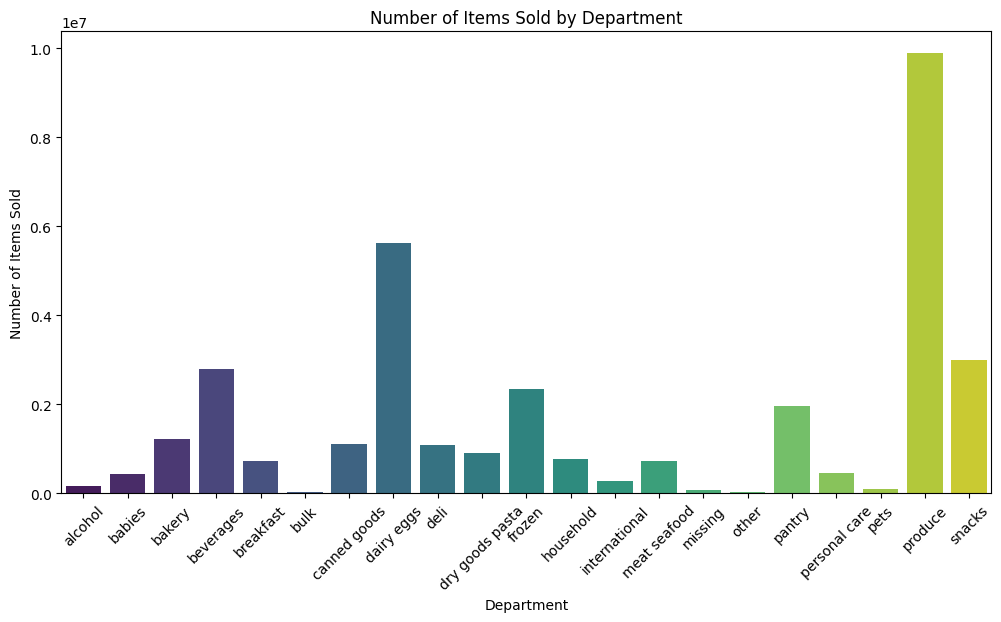

In [86]:
# Department Breakdown
department_sales = full_data['department'].value_counts()


# Plot the department sales
plt.figure(figsize=(12, 6))
sns.barplot(x=department_sales.index, y=department_sales.values, palette='viridis')
plt.title("Number of Items Sold by Department")
plt.ylabel("Number of Items Sold")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()

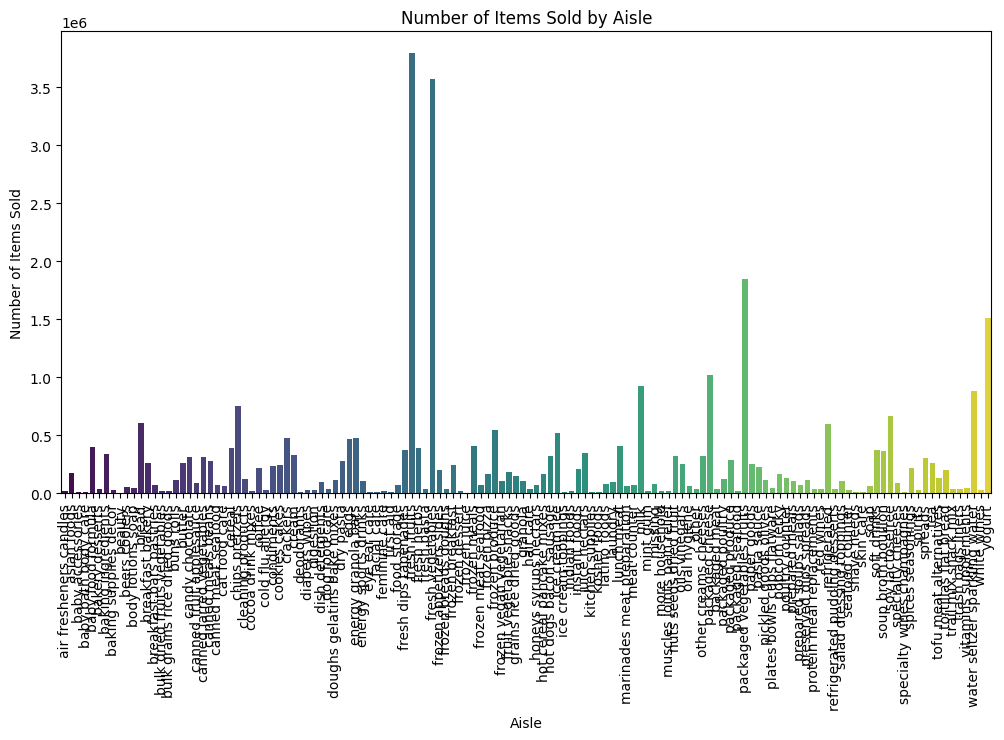

In [88]:
# aisle 
aisle_sales = full_data['aisle'].value_counts()

# Plot the aisle sales
plt.figure(figsize=(12, 6))
sns.barplot(x=aisle_sales.index, y=aisle_sales.values, palette='viridis')
plt.title("Number of Items Sold by Aisle")
plt.ylabel("Number of Items Sold")
plt.xlabel("Aisle")
plt.xticks(rotation=90)
plt.show()

## 2. Breakdown of the “Produce” Department by Aisle

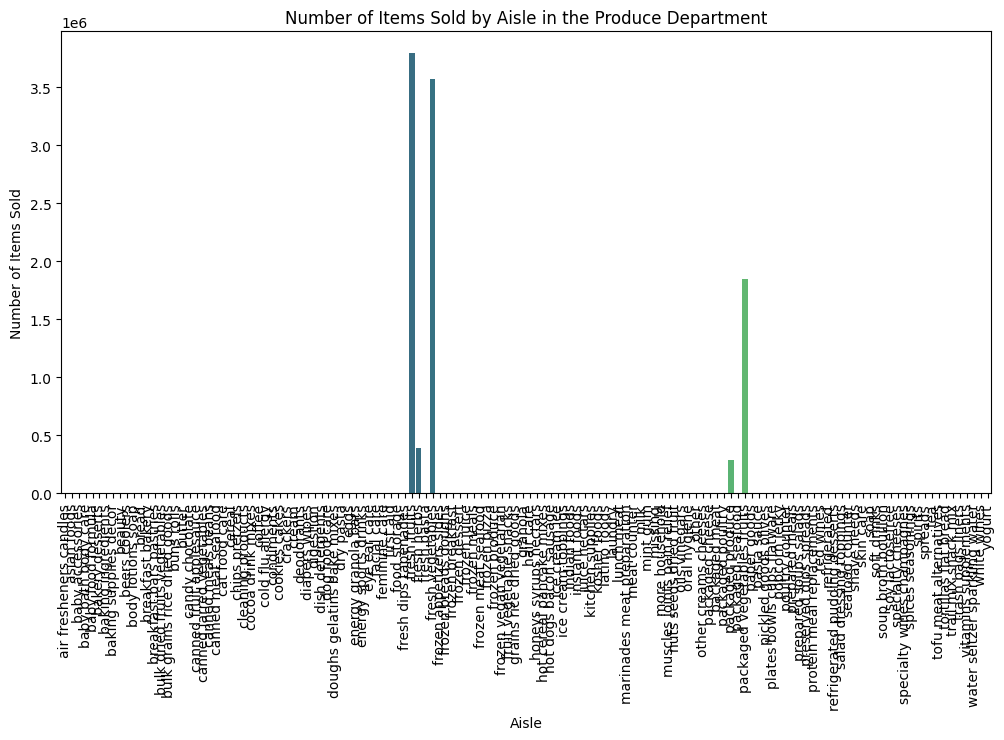

In [89]:
# Filter for the "produce" department
produce_df = full_data[full_data['department'] == 'produce']

# Count the number of items sold in each aisle within the "produce" department
produce_aisle_sales = produce_df['aisle'].value_counts()

# Plot 
plt.figure(figsize=(12, 6))
sns.barplot(x=produce_aisle_sales.index, y=produce_aisle_sales.values, palette='viridis')
plt.title("Number of Items Sold by Aisle in the Produce Department")
plt.ylabel("Number of Items Sold")
plt.xlabel("Aisle")
plt.xticks(rotation=90)
plt.show()

## 3. Differences in Purchasing Behavior Based on Different Departments or Aisles

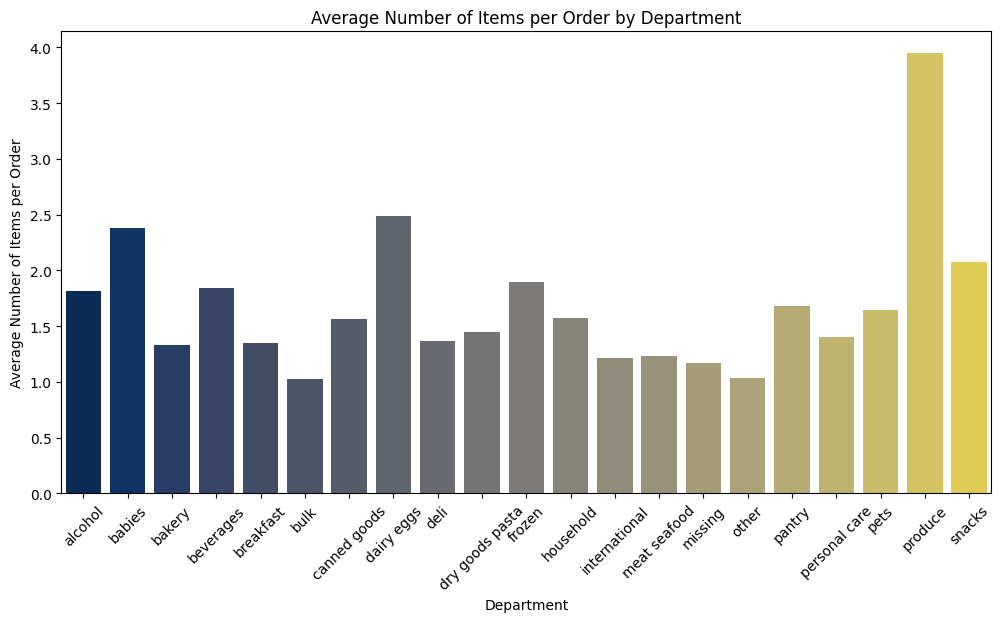

In [96]:
# Calculate the average number of items per order for each department
department_avg_items = full_data.groupby('department')['order_id'].count() / full_data.groupby('department')['order_id'].nunique()



# Plot the average number of items per order for departments
plt.figure(figsize=(12, 6))
sns.barplot(x=department_avg_items.index, y=department_avg_items.values, palette='cividis')
plt.title("Average Number of Items per Order by Department")
plt.ylabel("Average Number of Items per Order")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()

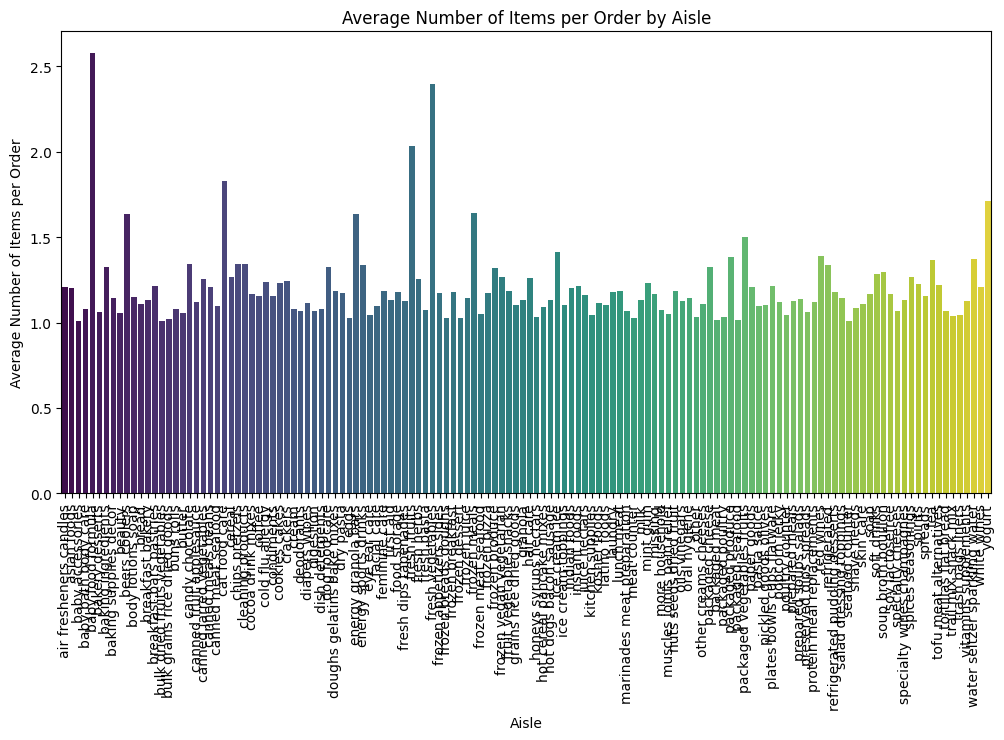

In [91]:
# Calculate the average number of items per order for each aisle
aisle_avg_items = full_data.groupby('aisle')['order_id'].count() / full_data.groupby('aisle')['order_id'].nunique()


# Plot the average number of items per order for aisles
plt.figure(figsize=(12, 6))
sns.barplot(x=aisle_avg_items.index, y=aisle_avg_items.values, palette='viridis')
plt.title("Average Number of Items per Order by Aisle")
plt.ylabel("Average Number of Items per Order")
plt.xlabel("Aisle")
plt.xticks(rotation=90)
plt.show()

# Thanks